In [2]:
pip install networkx matplotlib


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


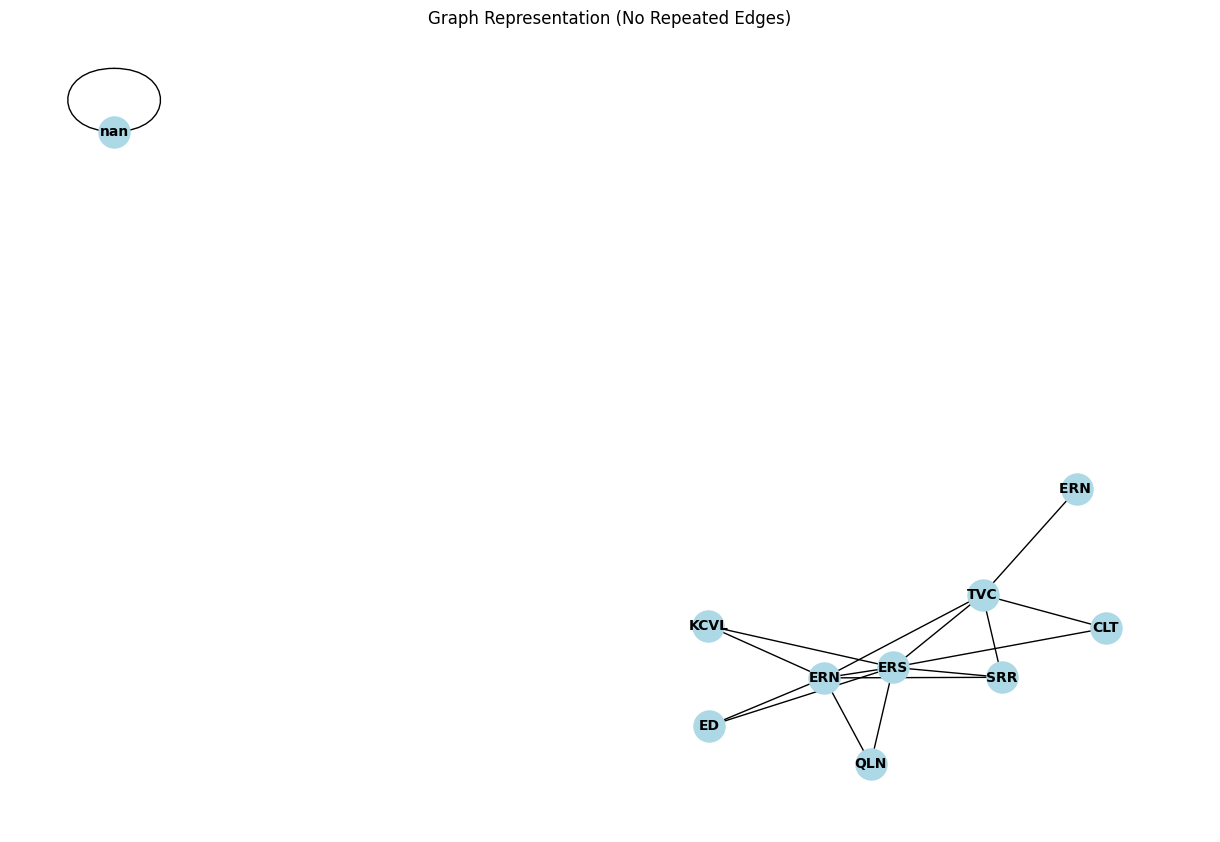

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data from the input CSV file (assuming it's named 'Try1(Sheet1).csv')
input_file = 'Try1(Sheet1).csv'
df = pd.read_csv(input_file)

# Rename the columns based on the provided header row and drop unwanted columns
df.columns = ['SignOn', 'SignOnDay', 'From', 'To', 'SignOff', 'SignOffDay', 'Col7', 'Col8', 'Col9', 'Col10']
df = df.drop(columns=['Col7', 'Col8', 'Col9', 'Col10'])

# Create an undirected graph using NetworkX
G = nx.Graph()  # Undirected graph

# Add edges based on 'From' and 'To', ensuring no repeated edges
for index, row in df.iterrows():
    from_node = row['From']
    to_node = row['To']
    if not G.has_edge(from_node, to_node):  # Only add the edge if it does not already exist
        G.add_edge(from_node, to_node)

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='black')
plt.title("Graph Representation (No Repeated Edges)")
plt.show()
